# Pre-Processing

## 1.Importing the libraries

In [22]:
import pandas as pd
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os

## 2. Importing the datasets

Note : the output.csv file is generated using the json-to-csv script with all of the json files in the same directory as the script as input

In [23]:
#-- Traffic Data -- 
traffic_data = pd.read_csv("Datasets/Traffic Detectors/Data/2023/April/output.csv")
traffic_data['intensity'] = pd.to_numeric(traffic_data['intensity'], errors='coerce')
traffic_data['occupancy'] = pd.to_numeric(traffic_data['occupancy'], errors='coerce')
traffic_data['dateObservedFrom'] = pd.to_datetime(traffic_data['dateObservedFrom'], errors='coerce')






/tmp/ipykernel_32429/1233871091.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  traffic_data['dateObservedFrom'] = pd.to_datetime(traffic_data['dateObservedFrom'], errors='coerce')


In [24]:
traffic_data.describe()

,intensity,occupancy
count,2787572.000,2787572.000
mean,173.614,12.649
std,235.795,21.639
min,0.000,0.000
25%,18.000,0.000
50%,90.000,3.000
75%,258.000,14.000
max,12504.000,100.000


## 3. Cleaning and Importing Datasets

### 3.1 Traffic Data

In [25]:

# Check for missing values
print(traffic_data.isnull().sum())

# Drop duplicates
traffic_data.drop_duplicates(inplace=True)
traffic_data.describe()


dateObservedFrom    0
dateObservedTo      0
id                  0
location            0
intensity           0
occupancy           0
dtype: int64


,intensity,occupancy
count,2787563.000,2787563.000
mean,173.615,12.649
std,235.795,21.639
min,0.000,0.000
25%,18.000,0.000
50%,90.000,3.000
75%,258.000,14.000
max,12504.000,100.000


### 3.2 Parking Lots

In [26]:
#-- Parking Lots --

# Directory where CSV files are located
csv_dir = 'Datasets/CMP_parkingLots'

# List of CSV files
csv_files = [
    'parque_cardosas_m.csv',
    'parque_casa_da_musica_pcm_m.csv',
    'parque_loule_m.csv',
    'parque_palacio_da_justica_m.csv',
    'parque_praca_lisboa_m.csv',
    'parque_ribeira_m.csv',
    'parque_trindade_m.csv'
]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate through each CSV file
for csv_file in csv_files:
    file_path = os.path.join(csv_dir, csv_file)

    # Read the CSV file
    df = pd.read_csv(file_path)

    if 'occupied_spaces' in df.columns:
        # Replace negative 'occupied_spaces' values with 0
        df['occupied_spaces'] = df['occupied_spaces'].apply(lambda x: max(0, x))

    # Add a column indicating the source file
    df['source_file'] = csv_file

    # Handle differences in column names
    if 'occupied_spaces' in df.columns and 'total_spaces' in df.columns:
        # Calculate 'available_spaces' by subtracting 'occupied_spaces' from 'total_spaces'


        df['available_spaces'] = df['total_spaces'] - df['occupied_spaces']
    elif 'available_spaces' not in df.columns and 'occupied_spaces' in df.columns:
        # If 'available_spaces' column is not present, and 'occupied_spaces' is present
        df['available_spaces'] = df['total_spaces'] - df['occupied_spaces']
    elif 'occupied_spaces' not in df.columns and 'available_spaces' in df.columns:
        # If 'occupied_spaces' column is not present, and 'available_spaces' is present
        pass  # No need to modify the DataFrame
    else:
        # Handle other cases as needed
        raise ValueError(f"Unsupported column structure in file: {csv_file}")
    
    if 'occupied_spaces' in df.columns:
        # Drop 'occupied_spaces' column
        df.drop('occupied_spaces', axis=1, inplace=True)

    # Concatenate the data to the combined DataFrame
    combined_data = pd.concat([combined_data, df], ignore_index=True)

combined_data.to_csv('Datasets/CMP_parkingLots/output.csv', index=False)


# Display the combined DataFrame
combined_data.head()
combined_data.describe()

,total_spaces,available_spaces
count,860332.000,860332.000
mean,256.957,214.871
std,156.372,109.353
min,0.000,-22.000
25%,250.000,189.000
50%,250.000,244.000
75%,250.000,250.000
max,893.000,798.000


## 3. Visualizing the data

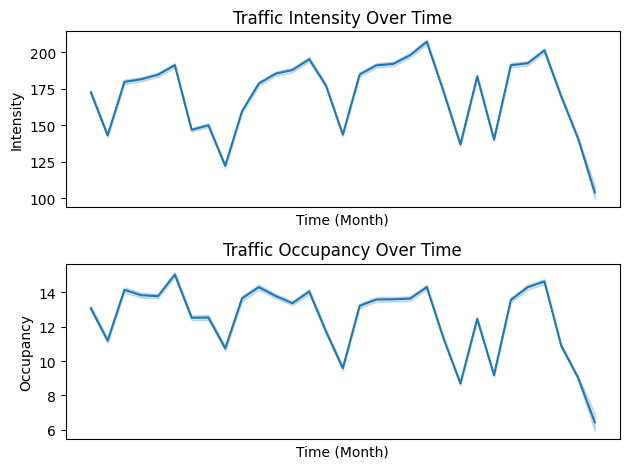

In [73]:
# Convert date columns to datetime objects
traffic_data['dateObservedFrom'] = pd.to_datetime(traffic_data['dateObservedFrom'], errors='coerce')

# Set 'dateObservedFrom' to midnight
traffic_data['dateObservedFrom'] = traffic_data['dateObservedFrom'].dt.normalize()

# Create a subplot with 2 rows and 1 column
plt.subplot(2, 1, 1)

# Line plot for 'intensity' over time
sb.lineplot(x='dateObservedFrom', y='intensity', data=traffic_data)
plt.title('Traffic Intensity Over Time')
plt.xlabel('Time (Month)')
plt.ylabel('Intensity')
plt.xticks([])

# Create a subplot with 2 rows and 1 column, and set the current subplot to the second one
plt.subplot(2, 1, 2)

# Line plot for 'occupancy' over time
sb.lineplot(x='dateObservedFrom', y='occupancy', data=traffic_data)
plt.title('Traffic Occupancy Over Time')
plt.xlabel('Time (Month)')
plt.ylabel('Occupancy')
plt.xticks([])

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()
